In [18]:
from recognition import *

In [19]:
import cv2
def add_margin_and_downscale(image, margin):
    original_resolution = (image.shape[1], image.shape[0])

    image_with_margin = cv2.copyMakeBorder(image, margin, margin, margin, margin, cv2.BORDER_CONSTANT, value=[255, 255, 255])
    
    # Downscale the image to the original resolution
    downscaled_image = cv2.resize(image_with_margin, original_resolution)
    
    return downscaled_image


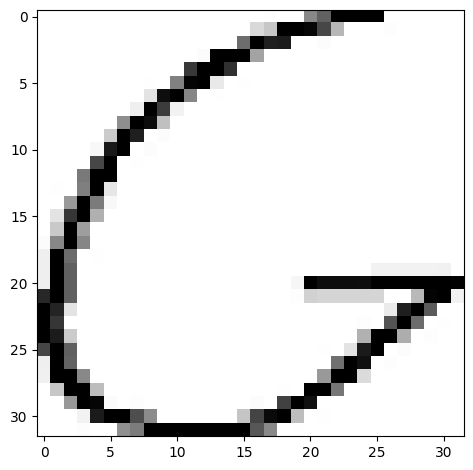

In [20]:
# test frame
image_filepath = 'dataset2/upperG/0.png'
frame = io.imread(image_filepath)
io.imshow(frame)

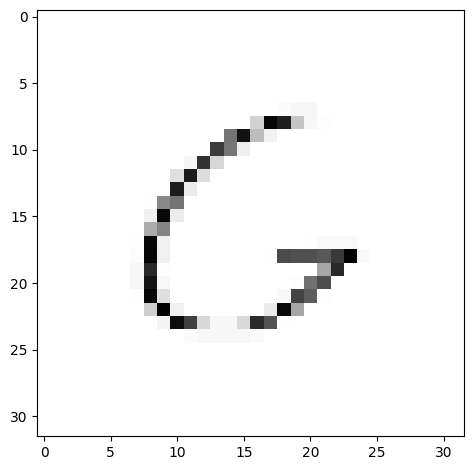

In [21]:
frame = add_margin_and_downscale(frame, 15)
io.imshow(frame)

In [23]:
# init model and label list
labels = list(range(NUM_LABELS))
final_labels = sorted(get_label_list('data/labels2.list'))
# model_path = 'data/model_20240217164634.pth'    # Saturday's model, 70 labels
# model_path = 'model/model_20240218093027.pth'    # Sunday's model, 90 labels
# model_path = 'model/model_20240218094122.pth'    # Sunday's CNN model, 90 labels

model = init_model(model_path)

# get predicted label for current frame
predicted_label, confidence = predict_label(frame, model, labels)
print(predicted_label,f' = {final_labels[predicted_label]},',confidence)

RuntimeError: Error(s) in loading state_dict for Net:
	Missing key(s) in state_dict: "conv1.weight", "conv1.bias", "conv2.weight", "conv2.bias", "conv3.weight", "conv3.bias". 
	size mismatch for fc1.weight: copying a param with shape torch.Size([128, 1024]) from checkpoint, the shape in current model is torch.Size([512, 2048]).
	size mismatch for fc1.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for fc2.weight: copying a param with shape torch.Size([70, 128]) from checkpoint, the shape in current model is torch.Size([90, 512]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([70]) from checkpoint, the shape in current model is torch.Size([90]).